In [2]:
import control
import numpy as np
import sympy as sym

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("bright")

# Case1

### Q1

In [3]:
## 四个特征矩阵
A = np.array([[-2.8, -1.4,    0,    0],
              [ 1.4,    0,    0,    0],
              [-1.8, -0.3, -1.4, -0.6],
              [   0,    0,  0.6,    0]])
B = np.array([1, 0, 1, 0]).reshape(-1,1)
C = np.array([0, 0, 0, 1])
D = np.array([0])

## 系统参数
ss1 = control.ss(A, B, C, D)
tf1 = control.ss2tf(ss1)
    

In [4]:
tf1

TransferFunction(array([1.77635684e-15, 6.00000000e-01, 6.00000000e-01, 9.24000000e-01]), array([1.    , 4.2   , 6.24  , 3.752 , 0.7056]))

In [5]:
## 有数值误差，舍去
tf1 = control.tf([0.6, 0.6, 0.924], [1, 4.2, 6.24, 3.752, 0.7056])
tf1

TransferFunction(array([0.6  , 0.6  , 0.924]), array([1.    , 4.2   , 6.24  , 3.752 , 0.7056]))

In [6]:
zero1 = tf1.zero()
pole1 = tf1.pole()   
print("Zeros:")
print(zero1)
print("Poles:")
print(pole1)

Zeros:
[-0.5+1.13578167j -0.5-1.13578167j]
Poles:
[-1.40000008 -1.39999992 -1.06055513 -0.33944487]


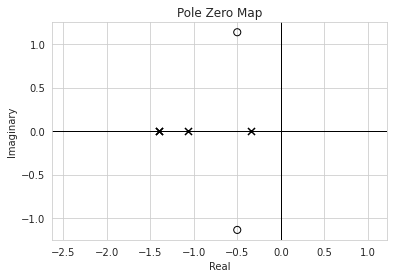

In [7]:
_, _ = control.pzmap(tf1, plot=True)

# Case2

### Q1

##### (1)

In [8]:
## 传递函数
def H(wn, epsilon):
    return control.tf(wn**2, [1, 2 * epsilon * wn, wn**2])

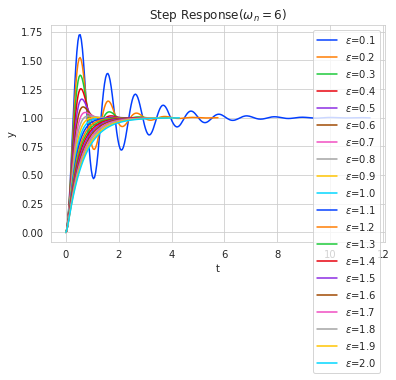

In [9]:
for epsilon in range(1, 21, 1):
    t, y= control.step_response(H(6, epsilon/10))
    plt.plot(t, y, label=f"$\epsilon$={epsilon/10}")
    
plt.title('Step Response($\omega_n=6$)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

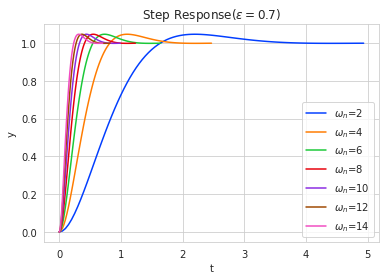

In [10]:
for wn in range(2, 15, 2):
    t, y= control.step_response(H(wn, 0.7))
    plt.plot(t, y, label=f"$\omega_n$={wn}")
    
plt.title('Step Response($\epsilon=0.7$)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

##### (2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


_____Eigenvalue______ Damping___ Frequency_
      -0.5    +0.866j        0.5          1
      -0.5    -0.866j        0.5          1
wn:[1. 1.]
epsilon:[0.5 0.5]


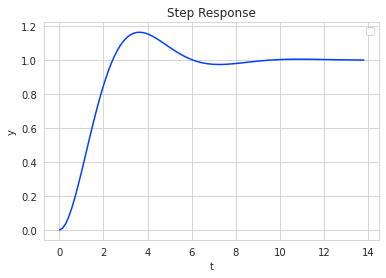

In [11]:
G2 = control.tf(1, [1, 1, 1])
paras = control.damp(G2)
wn2, epsilon2 = paras[0], paras[1]
print(f"wn:{wn2}")
print(f"epsilon:{epsilon2}")

t, y = control.step_response(G2)
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
wn2, epsilon2 = 1, 0.5
epsilon2_n = np.sqrt(1 - epsilon2**2)
Tr = (np.pi - np.arccos(epsilon2)) / (wn2 * epsilon2_n)
Tp = np.pi / (wn2 * epsilon2_n)
Ts_005 = - np.log(0.05 * epsilon2_n) / (epsilon2 * wn2)
sigma = np.exp(-(np.pi * epsilon2)/epsilon2_n)

print(f"Tp={Tp}")
print(f"Tr={Tr}")
print(f"Ts_005={Ts_005}")
print(f"sigma={sigma}")

Tp=3.6275987284684357
Tr=2.4183991523122903
Ts_005=6.2791466195597625
sigma=0.16303353482158048


# Case3

##### Q1

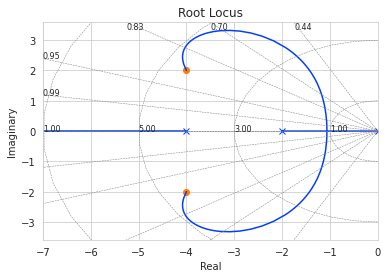

In [13]:
G3_1 = control.tf([10, 80, 200], [1, 4, 0])
H3_1 = control.tf(0.2, [1, 2])
GH3_1 = G3_1 * H3_1
points, gain = control.root_locus(GH3_1, xlim = [-7, 0])

In [14]:
G3_1 = control.tf([10 * 1.06, 80 * 1.06, 200 * 1.06], [1, 4, 0])
H3_1 = control.tf(0.2, [1, 2])
PHI3_1 = control.feedback(G3_1, H3_1)
zero3 = PHI3_1.zero()
pole3 = PHI3_1.pole()
print("Zeros:")
print(zero3)
print("Poles:")
print(pole3)

Zeros:
[-4.+2.j -4.-2.j -2.+0.j]
Poles:
[-4.74195413+0.j         -1.68902293+2.46752162j -1.68902293-2.46752162j]


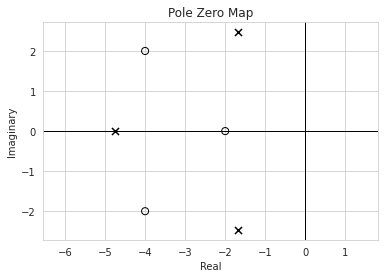

In [15]:
_, _ = control.pzmap(PHI3_1)

##### Q2

In [26]:
def Mp(K):
    G3_2 = control.tf([1*K, 6*K, 13*K], [1, 3, 0])
    H3_2 = control.tf(1, [1, 1])
    PHI3_2 = control.feedback(G3_2, H3_2)
    _, y = control.step_response(PHI3_2)
    return max(y)

for k in range(0, 2000, 1):
    if abs(Mp(k/1000) - 1.0948) < 0.001:
        print(k/1000)

0.147


In [17]:
G3_2 = control.tf([1 * 0.1926, 6 * 0.1926, 13 * 0.1926], [1, 3, 0])

zero4 = PHI3_2.zero()
pole4 = PHI3_2.pole()
print("Zeros:")
print(zero4)
print("Poles:")
print(pole4)

Zeros:
[-3.+2.j -3.-2.j -1.+0.j]
Poles:
[-3.11713812+0.j         -0.53773094+0.71699527j -0.53773094-0.71699527j]


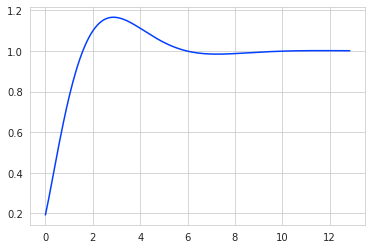

In [20]:
t, y = control.step_response(PHI3_2)

(array([-3.11713812+0.j        , -0.53773094+0.71699527j,
        -0.53773094-0.71699527j]),
 array([-3.+2.j, -3.-2.j, -1.+0.j]))

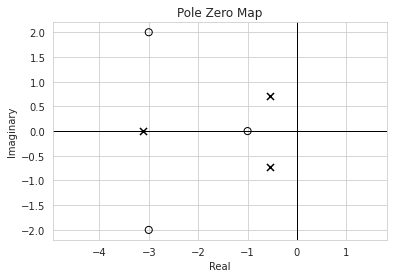

In [18]:
control.pzmap(PHI3_2)